Hi Ferdinand. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1 <a class="tocSkip">

Thank you for sending your project. You've done a really good job on it! While there's room for improvement, on the whole, your project is looking good. I've found some tiny mistakes in your project. They'll be easy to fix. There are also some comments for improvement. They don’t mean that you’ve done anything wrong, but they’re things we wanted to point out that can help you further develop your skills. I believe you can easily fix it!
    
## Review v. 2 <a class="tocSkip">
    
Your corrections look great, you've improved your work significantly! I'm glad to say that your project has been accepted. Keep up the good work.

# Project 3: Telecom operator

Task: 
You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

Steps:

1. Read data

2. Study general informations about the data:
    In this step, I will try to find errors in the given dataframes. This can be missing values, wrong data types or wrong values.
    
3. Preprocessing:
    Depending on the results from step 2, i will fix these errors by chanhing datatypes, etc..

4. Merging dataframes on id
    In this step I will create a big dataframe, which includes all the relevant and preprocessed data for the following steps
    
5. Calculate Costs for each user and month:
    In this step, a function will be created, which uses the merged data, to calculate the costs for all the users for evry month.
    
6. Analysis of the data:
    In this step the users of the 2 plan types will be examined in the consumption behavior and the results will be compared.
    
7. Testing of null- hypotheses:
    Two null- hypotheses will be tested:
    The average revenue from users of Ultimate and Surf calling plans are equal.
    The average revenue from users in NY-NJ area don't different from that of the users from other regions.

8: Overall conclusion

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It’s great that you described the project :)
</div>

## Read data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    
from scipy import stats as st
import math

calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")

print(calls.loc[21110])


id            1077_1077
user_id            1077
call_date    2018-12-17
duration           5.33
Name: 21110, dtype: object


## Study general informations about the data

### Search for wrong data types

In [2]:
calls.info()
print("-----------")
internet.info()
print("-----------")
messages.info()
print("-----------")
plans.info()
print("-----------")
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [3]:
print(calls.head())
print("-----------")
print(internet.head())
print("-----------")
print(messages.head())
print("-----------")
print(plans.head())
print("-----------")
print(users.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
-----------
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
-----------
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
-----------
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message 

Wrong data types found:


calls:

- id: string (1000_23) --> int (23)
- call_date: string --> date_time


internet:

- id: string (1000_23) --> int (23)
- session_date: string --> date_time


messages:

- id: string (1000_23) --> int (23)
- message_date: string --> date_time


users:

...


plans:

- reg_date: string --> date_time     

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, it's necessary to change data types.
</div>

### Search for missing values

In [4]:
# Function to count missing values for each columns in a DataFrame
def missing_data(data):
    # Count number of missing value in a column
    total = data.isnull().sum()           
    
    # Get Percentage of missing values
    percent = (data.isnull().sum()/data.isnull().count()*100)   
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent(%)'])

    # Create a Type column, that indicates the data-type of the column.
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    temp['Types'] = types

    return(np.transpose(temp))


In [5]:
missing_data(calls)

,id,user_id,call_date,duration
Total,0,0,0,0
Percent(%),0,0,0,0
Types,object,int64,object,float64


In [6]:
missing_data(internet)

,id,user_id,session_date,mb_used
Total,0,0,0,0
Percent(%),0,0,0,0
Types,object,int64,object,float64


In [7]:
missing_data(messages)

,id,user_id,message_date
Total,0,0,0
Percent(%),0,0,0
Types,object,int64,object


In [8]:
missing_data(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
Total,0,0,0,0,0,0,0,466
Percent(%),0,0,0,0,0,0,0,93.2
Types,int64,object,object,int64,object,object,object,object


In [9]:
missing_data(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
Total,0,0,0,0,0,0,0,0
Percent(%),0,0,0,0,0,0,0,0
Types,int64,int64,int64,int64,int64,float64,float64,object


### Search for wrong values

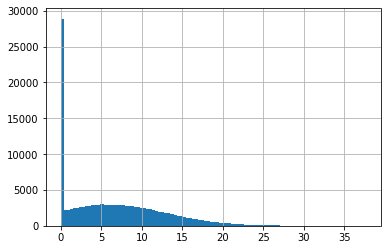

In [10]:
calls["duration"].hist(bins=100)
plt.show()

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Please add the axis labels and the title to the graph.
This applies to all other graphs too.
</div>

In [11]:
dur_0 = len(calls.loc[calls["duration"] == 0]) / len(calls)
print(dur_0)

0.1948233927469416


19.5% of the calls sessions have a duration of 0 minutes.

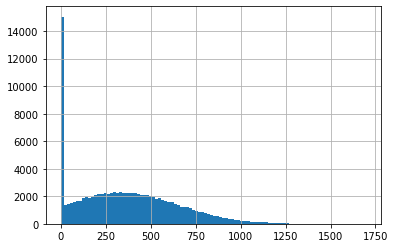

In [12]:
internet["mb_used"].hist(bins=100)
plt.show()

In [13]:
mb_0 = len(internet.loc[internet["mb_used"] == 0]) / len(internet)
print("Pecentage of phone calls with a duruation of 0: {:.1%}".format(mb_0))


Pecentage of phone calls with a duruation of 0: 13.1%


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that you can use .format to output only required number of decimal places (https://pyformat.info/).
</div>

13.1% of the Internet sessions have a data consumption of 0 MB.

In the two histograms above, we can see that there are calls with a duration of 0 minutes and Internet sessions with 0 MB used. Because they don't affect the costs for the consumer, I decided to delete them, in the next step. A possible reason for the 0 calls is that a call was rejected or the call recipient missed it. Internet sessions where no mb is consumed could be because the user was either surfing over a wifi network, or the browser was opened briefly and closed again.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please explain a possible reason of a zero duration calls?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, a reasonable explanation of a zero duration calls and interner usage.
</div>

### Conclusion

We have 5 records that can be classified into 3 different categories. The records "Call", "Inernet" and "Messages" are one category because they have a very similar structure. Here we can find the data about the consumption volume of the respective area. Each call, message and internet session is listed with its own ID in this record. The "plans" and "users" datasets are a unit by themselves. In the "plans" data we can find the data about the 2 products. There is information about the prices and the possible consumption quantities of the different areas. In the "users" data set we can find information about the users themselves. All these data are connected through the "id" column.

There are no missing values in the 5 records, except in the "churn_date" column of the "user" record. From this column we know that if the value is missing, the call plan was used when this data was retrieved.

Some of the data types should be changed for later processing. All date columns are strings. I change their type to "date_time". Also, there is a problem with the ids from the columns where the calls / messages / internet sessions get their own id. There we find a combination of the user id and the specific id. For example:
1000_93 (USER ID_SPECIFIC ID).
I'll remove the "_" and the user id, since it's already listed in the "id" column. After that I can convert the values in this column to integer.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, data is downloaded and ready for the further preparation and analysis.
</div>

## Preprocessing

Here I will do the steps I mentioned in the conclusion above.

### Change wrong data types

#### Date- columns

In [14]:
calls.info()
print()
messages.info()
print()
internet.info()
print()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data colum

In [15]:
calls["call_date"]= pd.to_datetime(calls["call_date"])
messages["message_date"]= pd.to_datetime(messages["message_date"]) 
internet["session_date"]= pd.to_datetime(internet["session_date"]) 
users["churn_date"] = pd.to_datetime(users["churn_date"]) 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you brought the data to the desired formats.
</div>

In [16]:
calls.info()
print()
messages.info()
print()
internet.info()
print()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB

<

#### Id- columns

To get integer values in the "id" column that do not contain the user ID, 3 steps are necessary: First, the user id is removed. For this I define the function "remove_user_id" which eliminates the user ID from the "id" column. For the second step I define another function "remove_character" which removes the "_" separator. After applying these 2 functions, only the id of the call/message/session remains, which I can convert to an integer in the last step. Because a loop function takes a lot of time to apply, if it itterates through a large data set, I defined "test_data", which just contains the first 3 rows of the "call"- data. The definition of the 2 methods needed ceveral trys, so testing it on a small data set saved a lot of time.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that wrote additional function for processing of user ID. Well done that you optimized testing of your function :)
</div>

In [17]:
test_data = calls.head(3)


def remove_user_id(data):
    data_new = data
    row_new =[]
    
    for index, row in data_new.iterrows():
        user_id = str(row["user_id"])
        new_id = row["id"].replace(user_id, '')
        #One problem has come up. If the id has the same value as the user_id, 
        #for example: 1070_1070, then the function eliminated both numbers
        #and all that is left is the value "_" in the "id" column. 
        #To fix this, there had to be an if condition that adds the user_id in these cases.
        if new_id =="_":
            new_id = user_id
        row_new.append(new_id)
        
    data_new["id"] = row_new
    return data_new



def remove_character(data, char):
    data_new = data
    row_new =[]
    
    for index, row in data_new.iterrows():
        row_new.append(row["id"].replace(char, ''))
        
    data_new["id"] = row_new
    return data_new

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that you can avoid warnings (if necessary) by using the code below.
</div>

In [18]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [19]:
print(test_data)
print()
test_data = remove_user_id(test_data)
print(test_data)
print()
test_data = remove_character(test_data, "_")
print(test_data)

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48

     id  user_id  call_date  duration
0   _93     1000 2018-12-27      8.52
1  _145     1000 2018-12-27     13.66
2  _247     1000 2018-12-27     14.48

    id  user_id  call_date  duration
0   93     1000 2018-12-27      8.52
1  145     1000 2018-12-27     13.66
2  247     1000 2018-12-27     14.48


Afer testing the functions, the real procession can begin. Applying the created function 3 times, can take a lot of time ~2 minutes.

In [20]:
calls = remove_user_id(calls)
calls = remove_character(calls, "_")

messages = remove_user_id(messages)
messages = remove_character(messages, "_")

internet = remove_user_id(internet)
internet = remove_character(internet, "_")

In [21]:
calls.info()
print (calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
    id  user_id  call_date  duration
0   93     1000 2018-12-27      8.52
1  145     1000 2018-12-27     13.66
2  247     1000 2018-12-27     14.48
3  309     1000 2018-12-28      5.76
4  380     1000 2018-12-30      4.22


### Delete 0-calls and 0-sessions

#### Delete 0-calls

In [22]:
print(len(calls))

137735


In [23]:
calls = calls.loc[calls["duration"]>0]

In [24]:
print(len(calls))

110901


#### Delete 0-sessions

In [25]:
print(len(internet))

104825


In [26]:
internet = internet.loc[internet["mb_used"]>0]

In [27]:
print(len(internet))

91078


## Merging dataframes on id

Since we have the consumption data split into 3 different datasets, we need to create one dataset that contains all the relevant data for the following steps. Each of the datasets will be grouped by "user_id" and "month" so that the combined dataset contains the total consumption data of each user for each month.
Since rounded up data is used in the calculation of phone and internet charges, adjustments still need to be made to the data. The telephone minutes are rounded up for each call. This step must therefore be done before aggregation. The data consumption is rounded up to whole GB only at the end of the month. This must therefore be done after aggregation.


In [28]:
#add the "month"- column
calls["month"] = pd.DatetimeIndex(calls["call_date"]).month 
messages["month"] = pd.DatetimeIndex(messages["message_date"]).month 
internet["month"] = pd.DatetimeIndex(internet["session_date"]).month 

In [29]:
print(calls.head())

    id  user_id  call_date  duration  month
0   93     1000 2018-12-27      8.52     12
1  145     1000 2018-12-27     13.66     12
2  247     1000 2018-12-27     14.48     12
3  309     1000 2018-12-28      5.76     12
4  380     1000 2018-12-30      4.22     12


In [30]:
calls["duration"] = np.ceil(calls["duration"])

In [31]:
print(calls.head())

    id  user_id  call_date  duration  month
0   93     1000 2018-12-27       9.0     12
1  145     1000 2018-12-27      14.0     12
2  247     1000 2018-12-27      15.0     12
3  309     1000 2018-12-28       6.0     12
4  380     1000 2018-12-30       5.0     12


In [32]:
calls_grouped = calls.groupby(['user_id', 'month']).agg({'duration': ['sum', "count"]}).reset_index()


In [33]:
messages_grouped = messages.groupby(['user_id', 'month']).agg({'id': ["count"]}).reset_index()


In [34]:
internet_grouped = internet.groupby(['user_id', 'month']).agg({'mb_used': ['sum']}).reset_index()


In [35]:
calls_grouped.columns=["user_id", "month", "duration_call", "count_call"]
messages_grouped.columns=["user_id", "month", "messages_count"]
internet_grouped.columns=["user_id", "month", "mb_used"]
print(calls_grouped.head())
print(messages_grouped.head())
print(internet_grouped.head())

   user_id  month  duration_call  count_call
0     1000     12          124.0          16
1     1001      8          182.0          22
2     1001      9          315.0          38
3     1001     10          393.0          47
4     1001     11          426.0          49
   user_id  month  messages_count
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36
   user_id  month   mb_used
0     1000     12   1901.47
1     1001      8   6919.15
2     1001      9  13314.82
3     1001     10  22330.49
4     1001     11  18504.30


In [36]:
total1= pd.merge(left = calls_grouped , 
                right = messages_grouped, how='outer',on=['user_id', 'month']).fillna(0)
total2=pd.merge(left = total1 , 
                right = internet_grouped, how='outer',on=['user_id', 'month']).fillna(0)

In [37]:
total=total2
print(total.head())

   user_id  month  duration_call  count_call  messages_count   mb_used
0     1000     12          124.0        16.0            11.0   1901.47
1     1001      8          182.0        22.0            30.0   6919.15
2     1001      9          315.0        38.0            44.0  13314.82
3     1001     10          393.0        47.0            53.0  22330.49
4     1001     11          426.0        49.0            36.0  18504.30


In [38]:
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaT  
1  2018-08-13      surf        NaT  
2  2018-10-21      surf        NaT  
3  2018-01-28      surf        NaT  
4  2018-05-23      surf        NaT  


In [39]:
users_cons = total.merge(users, on="user_id").drop(["first_name", "last_name", "age", "reg_date", "churn_date"], axis=1)

Before starting to calculate the costs for the user, the data volume must be rounded up to whole GB. The rounded-up number is then divided by 1024 again so that the calculations can continue with the unit MB.

In [40]:
import math
users_cons["mb_used"] = np.ceil(users_cons["mb_used"]/1024)*1024

With the new table "user_cons", we can calculate the costs for each user per month. The values in the "duration" and "mb_used" columns were rounded up with the np.ceil() function.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
It will be more convenient to use .ceil to round up data.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, a reasonable explanation of a zero duration calls and internet usage.
</div>

## Calculate Costs for each user and month

In the new dataframe "user_cons", we created in the last step, we have the necessary data for calculating the costs. The dataframe "plans" contains the specific costs for the consumption categories. We will use the values of it and multiply them with the values from the "user_cons" dataframe. This step will be done by the function "calculate_costs".

In [41]:
print(users_cons.head(3))

   user_id  month  duration_call  count_call  messages_count  mb_used  \
0     1000     12          124.0        16.0            11.0   2048.0   
1     1001      8          182.0        22.0            30.0   7168.0   
2     1001      9          315.0        38.0            44.0  14336.0   

                                    city      plan  
0  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  
1        Seattle-Tacoma-Bellevue, WA MSA      surf  
2        Seattle-Tacoma-Bellevue, WA MSA      surf  


In [42]:
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [43]:
def calculate_costs(data):
    costs =[]
    for index, row in data.iterrows():
        
        if row["plan"] == "surf":
            
                          
            minutes_included = 500 
            messages_included  = 50
            mb_per_month_included = 15360 
            usd_monthly_pay = 20  
            usd_per_minute = 0.03  
            usd_per_message = 0.03            
            usd_per_gb = 10             
                
            
        elif row["plan"] == "ultimate":
            minutes_included = 3000   
            messages_included  = 1000    
            mb_per_month_included = 30720              
            usd_monthly_pay = 70  
            usd_per_minute = 0.01 
            usd_per_message = 0.01  
            usd_per_gb = 7             
                      
             
            
        exc_calls = row["duration_call"]-minutes_included
        exc_messages = row["messages_count"]-messages_included
        exc_internet = row["mb_used"]-mb_per_month_included
        
        
        costs_calls = max(0, exc_calls) * usd_per_minute
        costs_messages = max(0, exc_messages) * usd_per_message
        costs_internet = max(exc_internet, 0) * usd_per_gb / 1024
        costs_total = costs_calls + costs_messages + costs_internet + usd_monthly_pay
        
        costs.append(costs_total)

    data["costs"] = costs

In [44]:
calculate_costs(users_cons)
print(users_cons.sort_values("costs"))

print(len(users_cons.loc[users_cons["costs"]>100])/len(users_cons))

      user_id  month  duration_call  count_call  messages_count  mb_used  \
1351     1297     11           94.0        11.0             0.0  12288.0   
510      1110      5           71.0        11.0            12.0   8192.0   
509      1109     12          467.0        50.0             0.0  13312.0   
508      1109     11          465.0        56.0             0.0  11264.0   
502      1109      5          437.0        49.0             0.0  13312.0   
...       ...    ...            ...         ...             ...      ...   
1101     1240      8         1095.0       118.0            15.0  50176.0   
1334     1292     12          144.0        21.0             0.0  52224.0   
1330     1292      8          323.0        35.0             0.0  52224.0   
2270     1121     12            0.0         0.0            97.0  67584.0   
1726     1379     12         1103.0       114.0           126.0  71680.0   

                                                  city  plan   costs  
1351            

With the function "calculate_costs" a new column "costs" was defined and calculated. Now we have the costs for evry user and month, which we can use for answering the questions in the following steps.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that it’s necessary to add a conclusion for each part of the project. Please take it into account for the future. 
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

## Analysis of the data

In this step I will create 2 data slices: surf_slice and ultimate_slice, which only contain the data of people with the considered calling plan. This allows me to describe and compare the consumption behavior of the 2 groups of people.

In [45]:
surf_slice = users_cons.loc[users_cons["plan"]=="surf"]
ultimate_slice = users_cons.loc[users_cons["plan"]=="ultimate"]

### Users with surf calling plan

In [46]:
surf_slice.drop(["user_id", "month", "count_call", "costs"], axis=1).describe()

,duration_call,messages_count,mb_used
count,1573.000000,1573.000000,1573.000000
mean,428.749523,31.159568,17070.789574
std,234.453150,33.566717,8035.862417
min,0.000000,0.000000,0.000000
25%,272.000000,3.000000,12288.000000
50%,425.000000,24.000000,17408.000000
75%,576.000000,47.000000,21504.000000
max,1510.000000,266.000000,71680.000000


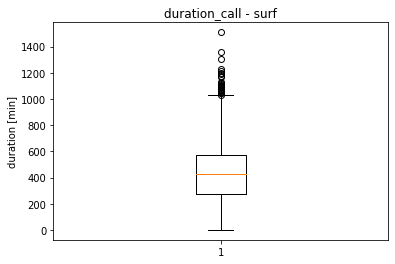

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(surf_slice["duration_call"])

ax.set_title('duration_call - surf')
ax.set_ylabel('duration [min]')
plt.show()

Most people with the Surf plan have a total call duration between 255-545 minutes with a median of 400 minutes per month. Only a few people have a total call duration of up to 1000 minutes per month.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you plotted boxplot and described an outliers in details.
</div>

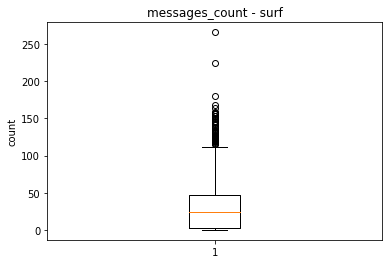

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(surf_slice["messages_count"])

ax.set_title('messages_count - surf')
ax.set_ylabel('count')
plt.show()

Most people with the Surf plan have a total message count between 0-50 minutes with a median of 25 per month. Only a few people write up to 120 messages per month.

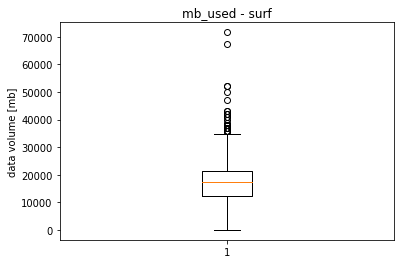

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(surf_slice["mb_used"])

ax.set_title('mb_used - surf')
ax.set_ylabel('data volume [mb]')
plt.show()

Most people with the Surf plan have a total data consumption between 12.3-21.5 GB with a median of 16.4 GB per month. Only a few people consume up to 35 GB per month.

In [50]:
av_minutes_surf = surf_slice["duration_call"].mean()
av_messages_surf = surf_slice["messages_count"].mean()
av_mb_surf = surf_slice["mb_used"].mean()

sd_minutes_surf = np.std(surf_slice["duration_call"])
sd_messages_surf = np.std(surf_slice["messages_count"])
sd_mb_surf = np.std(surf_slice["mb_used"])

var_minutes_surf = surf_slice["duration_call"].var()
var_messages_surf = surf_slice["messages_count"].var()
var_mb_surf = surf_slice["mb_used"].var()


print("Average - minutes of phone calls per month: {:.2f}".format(av_minutes_surf)) 
print("Standard deviation - minutes of phone calls per month: {:.2f}".format(sd_minutes_surf))
print("Variance - minutes of phone calls per month: {:.2f}".format(var_minutes_surf))

print()
print("Average - messsages per month: {:.2f}".format(av_messages_surf))
print("Standard deviation - messages per month: {:.2f}".format(sd_messages_surf))
print("Variance - messages per month: {:.2f}".format(var_messages_surf))

print()
print("Average - MB consumed per month: {:.2f}".format(av_mb_surf))
print("Standard deviation - MB consumed per month: {:.2f}".format(sd_mb_surf))
print("Variance - MB consumed per month: {:.2f}".format(var_mb_surf))

print()


Average - minutes of phone calls per month: 428.75
Standard deviation - minutes of phone calls per month: 234.38
Variance - minutes of phone calls per month: 54968.28

Average - messsages per month: 31.16
Standard deviation - messages per month: 33.56
Variance - messages per month: 1126.72

Average - MB consumed per month: 17070.79
Standard deviation - MB consumed per month: 8033.31
Variance - MB consumed per month: 64575084.78



In the cell above, we can see the means, standard deviations and variances of the consumption of the surf users. For the "duration_call" and the "mb_used" column we have a standard deviation half as high as the mean. For the "messages_count" column it is  even higher than the mean. That means that the users as individuals differ a lot in their consumption. 

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Well done that you calculated mean and standard deviation, but please add variance. Could you please analyse these values and make a corresponding conclusions?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
An excellent analysis :)
</div>

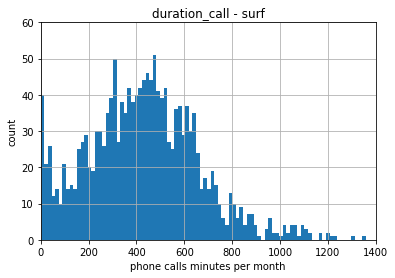

In [51]:
pl = surf_slice["duration_call"].hist(bins=100)
pl.set_xlabel("phone calls minutes per month")
pl.set_ylabel("count")
pl.set_xlim(0, 1400)
pl.set_ylim(0, 60)
pl.set_title('duration_call - surf')
plt.show()  


As we already saw in the boxplot of this column, most people with the Surf plan have a total call duration between 255-545 minutes with a median of 400 minutes per month. Only a few people have a total call duration of up to 1000 minutes per month. Additionally we can see here, that many users have less than 100 call minutes per month. The graph increases close to x=0.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
It's great that you didn't forget the axis labels and the title to the graph. But could you please analyse graph? Please note that after each of the graphds should be description/conclusions.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok, now graph looks better :)
    
Well done that you analyzed the graph in details.
</div>

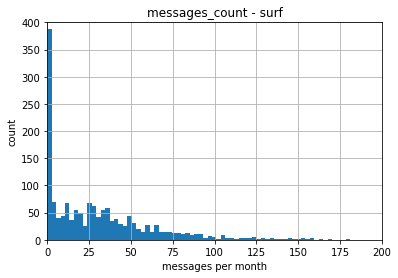

In [52]:
pl = surf_slice["messages_count"].hist(bins=100)
pl.set_xlabel("messages per month")
pl.set_ylabel("count")
pl.set_xlim(0, 200)
pl.set_ylim(0, 400)
pl.set_title('messages_count - surf')
plt.show()  


As we already saw in the boxplot of this column, most people with the Surf plan have a total message count between 0-50 minutes with a median of 25 per month. Only a few people write up to 120 messages per month. Additionally we can see here, that the graph is increasing a lot close to x=0. That means, that many people don't write messages at all.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
An excellent analysis :) But could you please why many people don't write messages?
</div>

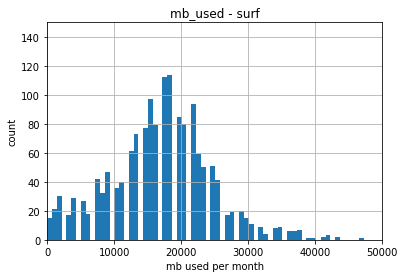

In [53]:
pl = surf_slice["mb_used"].hist(bins=100)
pl.set_xlabel("mb used per month")
pl.set_ylabel("count")
pl.set_xlim(0, 50000)
pl.set_ylim(0, 150)
pl.set_title('mb_used - surf')
plt.show()  


As we already saw in the boxplot of this column, most people with the Surf plan have a total data consumption between 12.3-21.5 GB with a median of 16.4 GB per month. Only a few people consume up to 35 GB per month. Since the monthly totals of data consumption were rounded, it looks like the graph has gaps

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please increase range for the y axis to see all data on the graph?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
An excellent graph and analysis :)
</div>

### Users with ultimate calling plan

In [54]:
ultimate_slice.drop(["user_id", "month", "count_call", "costs"], axis=1).describe()

,duration_call,messages_count,mb_used
count,720.000000,720.000000,720.000000
mean,430.450000,37.551389,17722.311111
std,240.508762,34.767179,7854.190127
min,0.000000,0.000000,0.000000
25%,260.000000,7.000000,13312.000000
50%,424.000000,30.000000,17408.000000
75%,565.250000,61.000000,21504.000000
max,1369.000000,166.000000,47104.000000


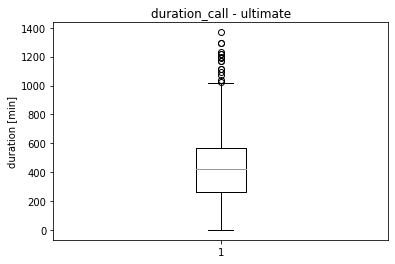

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(ultimate_slice["duration_call"])

ax.set_title('duration_call - ultimate')
ax.set_ylabel('duration [min]')
plt.show()


Most people with the Ultimate plan have a total call duration between 245-535 minutes with a median of 400 minutes per month. Only a few people have a total call duration of up to 1000 minutes per month.

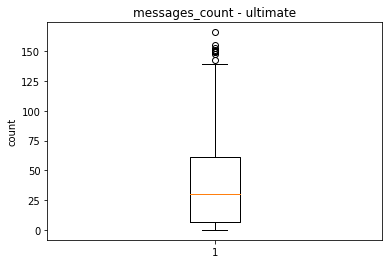

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(ultimate_slice["messages_count"])

ax.set_title('messages_count - ultimate')
ax.set_ylabel('count')
plt.show()

Most people with the Ultimate plan have a total message count between 7-60 minutes with a median of 30 per month. Only a few people write up to 140 messages per month.

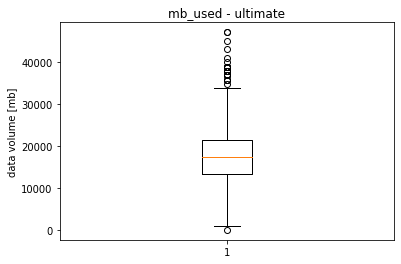

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(ultimate_slice["mb_used"])

ax.set_title('mb_used - ultimate')
ax.set_ylabel('data volume [mb]')
plt.show()

Most people with the Surf plan have a total data consumption between 12.3-21 GB with a median of 16.4 GB per month. Only a few people consume up to 35 GB per month.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
I see you analysed boxplots clearly, well done.
    
Please see additional link for an outliers analysis: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 
</div>

In [58]:
av_minutes_ultimate = ultimate_slice["duration_call"].mean()
av_messages_ultimate = ultimate_slice["messages_count"].mean()
av_mb_ultimate = ultimate_slice["mb_used"].mean()

sd_minutes_ultimate = np.std(ultimate_slice["duration_call"])
sd_messages_ultimate = np.std(ultimate_slice["messages_count"])
sd_mb_ultimate = np.std(ultimate_slice["mb_used"])

var_minutes_ultimate = ultimate_slice["duration_call"].var()
var_messages_ultimate = ultimate_slice["messages_count"].var()
var_mb_ultimate = ultimate_slice["mb_used"].var()
 
print("Average minutes of phone calls per month: {:.2f}".format(av_minutes_ultimate)) 
print("Standard deviation minutes of phone calls per month: {:.2f}".format(sd_minutes_ultimate))
print("Variance - minutes of phone calls per month: {:.2f}".format(var_minutes_ultimate))
print()
print("Average messsages per month: {:.2f}".format(av_messages_ultimate)) 
print("Standard deviation messsages per month: {:.2f}".format(sd_messages_ultimate))
print("Variance - messages per month: {:.2f}".format(var_messages_ultimate))
print()
print("Average MB consumed per month: {:.2f}".format(av_mb_ultimate))
print("Standard MB consumed per month: {:.2f}".format(sd_mb_ultimate))
print("Variance - MB consumed per month: {:.2f}".format(var_mb_ultimate))
print()


Average minutes of phone calls per month: 430.45
Standard deviation minutes of phone calls per month: 240.34
Variance - minutes of phone calls per month: 57844.46

Average messsages per month: 37.55
Standard deviation messsages per month: 34.74
Variance - messages per month: 1208.76

Average MB consumed per month: 17722.31
Standard MB consumed per month: 7848.73
Variance - MB consumed per month: 61688302.55



In the cell above, we can see the means, standard deviations and variances of the consumption of the ultimate users. For the "duration_call" and the "mb_used" column we have a standard deviation half as high as the mean. For the "messages_count" column it is almost equal to the mean. That means that the users as individuals differ a lot in their consumption. We had a similar result for the surf users.

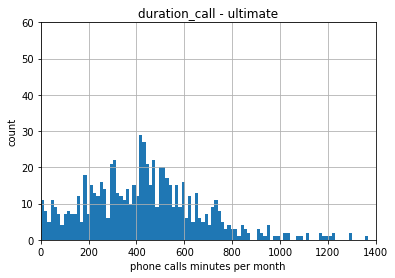

In [59]:
pl = ultimate_slice["duration_call"].hist(bins=100)
pl.set_xlabel("phone calls minutes per month")
pl.set_ylabel("count")
pl.set_xlim(0, 1400)
pl.set_ylim(0, 60)
pl.set_title('duration_call - ultimate')
plt.show()  


As we already saw in the boxplot of this column, most people with the Ultimate plan have a total call duration between 245-535 minutes with a median of 400 minutes per month. Only a few people have a total call duration of up to 1000 and more minutes per month. It is interesting to note here that the proportion of people who have a total call duration close to 0 is lower than for Surf users.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you correctly described the yusers behaviour.
</div>

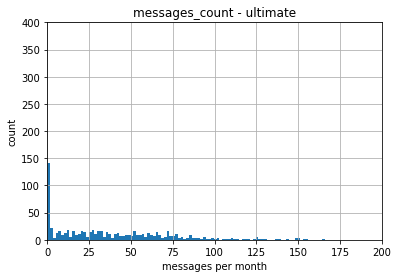

In [60]:
pl = ultimate_slice["messages_count"].hist(bins=100)
pl.set_xlabel("messages per month")
pl.set_ylabel("count")
pl.set_xlim(0, 200)
pl.set_ylim(0, 400)
pl.set_title('messages_count - ultimate')
plt.show()  


As we already saw in the boxplot of this column, most people with the Ultimate plan have a total message count between 7-60 minutes with a median of 30 per month. Only a few people write up to 140 messages per month. Additionally we can see here, that the graph is increasing a lot close to x=0. That means, that many people don't write messages at all. 

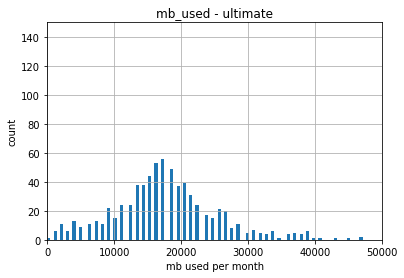

In [61]:
pl = ultimate_slice["mb_used"].hist(bins=100)
pl.set_xlabel("mb used per month")
pl.set_ylabel("count")
pl.set_xlim(0, 50000)
pl.set_ylim(0, 150)
pl.set_title('mb_used - ultimate')
plt.show()  


Most people with the Surf plan have a total data consumption between 12.3-21 GB with a median of 16.4 GB per month. Only a few people consume up to 35 GB per month. Since the monthly totals of data consumption were rounded, it looks like the graph has gaps

### Comparison and conclusion

If we compare the customers with the Surf tariff with the customers with the Ultimate tariff, we see that there is not much difference in consumption. In all 3 categories, customers with the Ultimate tariff have a higher consumption. The biggest difference is in message writing: Ultimate users write 20.51% more messages. The total duration of phone calls are almost identical and the data consumption of Ultimate- users ist a bit higher (~4%). Also the standard deviation is very similar for the two user types. 

In [62]:
print("Ultimate users have {:.2%} more phone call minutes.".format(av_minutes_ultimate/av_minutes_surf-1))
print("Ultimate users write {:.2%} more messages.".format(av_messages_ultimate/av_messages_surf-1))
print("Ultimate users consume {:.2%} more data volume.".format(av_mb_ultimate/av_mb_surf-1))

Ultimate users have 0.40% more phone call minutes.
Ultimate users write 20.51% more messages.
Ultimate users consume 3.82% more data volume.


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's good that you compared the plans.
</div>

## Testing of the null-hypothesis

### Ultimate and Surf calling plans

In [63]:
revenues_surf = users_cons.loc[users_cons["plan"]=="surf"]["costs"]
revenues_ultimate = users_cons.loc[users_cons["plan"]=="ultimate"]["costs"]

We have 2 statistical populations in this study: consumers who have the Surf plan and consumers who have the Ultimate plan. We want to test if the average revenues of the calling plans differ. Therefore we do the Equality of means hypothesis test.

The Null Hypothesis is: The average revenue from users of Ultimate and Surf calling plans are equal.

The Alternative Hypothesis is: The average revenue from users of Ultimate and Surf calling plans differ.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you formulated the null and alternative hypotheses explicitly.
</div>

In [64]:
average_revenues_surf=revenues_surf.mean().round(2)
average_revenues_ultimate=revenues_ultimate.mean().round(2)
print("revenue average - surf: {}$".format(average_revenues_surf))
print("revenue average - ultimate: {}$".format(average_revenues_ultimate))

revenue average - surf: 60.71$
revenue average - ultimate: 72.31$


The average of revenues from our data sample shows the picture that ultimate revenues are higher than surf revenues.

In [65]:
results = st.ttest_ind(revenues_surf, revenues_ultimate)

alpha = .05

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  2.862674510698644e-08
We reject the null hypothesis


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Maybe this link will be interesting for you: https://www.analyticsvidhya.com/blog/2019/09/everything-know-about-p-value-from-scratch-data-science/
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please describe results of the statistical test?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you right. We have a statistically significant differences in the average revenue from users of Ultimate and Surf plans.
</div>

### Consumers from NY-NJ

In [66]:
ny_nj = users_cons.loc[users_cons["city"].str.contains("NY-NJ")]["costs"]
other_regions = users_cons.loc[~users_cons["city"].str.contains("NY-NJ")]["costs"]
print(len(ny_nj)/len(users_cons))
print(len(other_regions)/len(users_cons))


0.16441343218491059
0.8355865678150894


Consumers from the NJ-NY area make up 16.4% of the population.

Again we have 2 statistical populations: Consumers from NJ-NY and consumers who are not from NJ-NY. We want to test if the the average revenue from users in NY-NJ area is different from that of the users from other regions. Therefore we do the Equality of means hypothesis test.

The Null Hypothesis is: The average revenue from users in NY-NJ area and users from other regions are equal.

The Alternative Hypothesis is: The average revenue from users in NY-NJ area and users from other regions differ.


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, a correct hypotheses formulation :)
</div>

In [67]:
average_ny_nj = ny_nj.mean().round(2)
average_other_regions = other_regions.mean().round(2)
print("average revenues from people from NJ-NY: {}$".format(average_ny_nj))
print("average revenues from people from other regions: {}$".format(average_other_regions))

average revenues from people from NJ-NY: 59.92$
average revenues from people from other regions: 65.22$


The mean values from our data samples depend on whether an individual is from NJ-NY area or not.In average, people from NY-NJ area bring less revenues than people from other regions in our data sample.

In [68]:
results = st.ttest_ind(ny_nj, other_regions)

alpha = .05

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  0.043557431621342436
We reject the null hypothesis


<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please check this result?
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Please note that there is no a statistically significant differences in the average revenue from users in NY-NJ area and users from other regions.
    
I suppose that differences are due to data preparation (removing zero call sand so on).
</div>

### Conclusion

In both tests, the null hypotheses that the statistical populations are equal in their average revenues were rejected. This means that the alternative hypotheses that the average revenues in the 2 populations differ are significant.

It's significant, that average revenues from users in NY-NJ area are less htan revenues from users in other regions and it's significant, that the average revenues from users of Ultimate are higher than the revenues from users of the Surf calling plan.

## Overall conclusion

In summary, customers generally do not differ much in their consumption behavior. Additional tests could be carried out to check this for significance, but this would go beyond the scope of this project. More important was the question of which tariff type generates greater sales on average. It can be said significantly that the Ultimate tariff is more profitable and should therefore be marketed better. In our sample, Surf customers brought in an average of 57.18 $ and Ultimate customers brought in an average of 72.11 $ per month. Customers from the NJ-NY area brought in less revenue on average than customers from other regions, which may be due to denser WLAN networks in metropolitan areas.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
The Smart tariff will be more profitable for the operator. Could you please explain why? It will be nice to describe all main results of the project (data, anomalies, trends and so on).
</div>